In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
filename1 = 'results_evaluation_species_25_score.csv'
filename2 = 'results_evaluation_species_25.csv'

df = pd.read_csv('../ResultsEvaluation/'+filename1, sep='\t')
df2 = pd.read_csv('../ResultsEvaluation/'+filename2, sep='\t')

df

,Classifier,tp,fp,fn,ok,no,(tp+fp+fn+ok+no),sens,prec,f1,pearson
0,strex_centrifuge_250000.res,2174170,233414,345022,372394,0,3125000,0.695734,0.903051,0.785951,0.897337
1,strex_centrifuge_25000_SP.res,2225615,247644,278157,373584,0,3125000,0.712197,0.899871,0.795110,0.901142
2,strex_centrifuge_25000_ST.res,2180808,190701,354323,399168,0,3125000,0.697859,0.919587,0.793525,0.947290
3,strex_clark_genus_250000.res,0,9530,486494,2628976,0,3125000,0.000000,0.000000,0.000000,NaN
4,strex_clark_genus_25000_SP.res,0,10795,393196,2721009,0,3125000,0.000000,0.000000,0.000000,NaN
5,strex_clark_genus_25000_ST.res,0,11113,458772,2655115,0,3125000,0.000000,0.000000,0.000000,NaN
6,strex_clark_species_250000.res,2117987,206058,800955,0,0,3125000,0.677756,0.911336,0.777379,0.887492
7,strex_clark_species_25000_SP.res,2186802,231692,706506,0,0,3125000,0.699777,0.904200,0.788962,0.892534
8,strex_clark_species_25000_ST.res,2097122,195299,832579,0,0,3125000,0.671079,0.914807,0.774214,0.938078
9,strex_kraken1_250000.res,2148207,229175,376502,371116,0,3125000,0.687426,0.903602,0.780828,0.887158


fn = false negatives

tp = true positives

tn = true negatives

Recall  = tp/all

Precision = (all-fp) / all

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Ste tabelle si fanno assolutamente su Latex.



| Dataset | Tool | Species    | ||   | Genus   | |||
|---:|:--|:-----|:------|:------|:------|:------|:------|:------|:------|
|   | | **Precision**    |**Recall** | **F-m**||  **Precision**  | **Recall**   | **f-m**|
|**all_250000**| centrifuge      | 0.695734     |0.903051    |0.boh|   |  0.988  | 0.629   | 0.762|
|              | centrifuge_SP   | 0.713023     |0.899880    |0.boh|   |  0.988  | 0.629   | 0.762|
|              |**Diff**         | 0.17289      |-0.3171     |0.boh|   |  0.988  | 0.629   | 0.762| 
|              | kraken1         | 0.687426     |0.903602    |0.boh|   |  0.988  | 0.629   | 0.762|
|              | kraken1_SP      | 0.700920     |0.899193    |0.boh|   |  0.988  | 0.629   | 0.762|
|              |**Diff**         | 0.13494      |-0.4409     |0.boh|   |  0.988  | 0.629   | 0.762| 



In [8]:
def ClassifiersPlt(name):
    new_df = df[df["Classifier"].str.contains(name)]    

    x = new_df['Classifier']
    y1 = new_df['sens'] * 100
    y2 = new_df['prec'] * 100
    y3 = new_df['f1'] * 100

    plt.figure(figsize=(20,8))

    #label
    plt.plot(x, y1, color='darkgreen', marker='o', linestyle='dashed',linewidth=2, markersize=15, label='Recall')

    plt.plot(x, y2, color='orange', marker='^', linestyle='dashed',linewidth=2, markersize=15, label='Precision')

    plt.plot(x, y3, color='blue', marker='*', linestyle='dashed',linewidth=2, markersize=15, label='F1')


    plt.ylim(0,101)
    plt.yticks(np.arange(0,101,5))
    plt.grid(True)
    plt.legend(loc='lower right')

    plt.xlabel('Classifiers',fontsize=14)
    plt.ylabel('Evaluation [%]',fontsize=14)
    
    plt.title(name,fontweight='bold',fontsize=20)

In [9]:
def CompareResults(name, df1, filename1, df2, filename2, column):
    
    new_df1 = df1[df1["Classifier"].str.contains(name)]  
    new_df2 = df2[df2["Classifier"].str.contains(name)]    

    # both dfs have to correspond with the same classifiers
    x = new_df1['Classifier']
    y1 = new_df1[column] * 100
    y2 = new_df2[column] * 100

    plt.figure(figsize=(20,8))

    #label
    plt.plot(x, y1, color='darkgreen', marker='o', linestyle='dashed',linewidth=2, markersize=15, label=filename1 )

    plt.plot(x, y2, color='orange', marker='^', linestyle='dashed',linewidth=2, markersize=15, label=filename2)



    plt.ylim(0,101)
    plt.yticks(np.arange(0,101,5))
    plt.grid(True)
    plt.legend(loc='lower right')

    plt.xlabel('Classifiers',fontsize=14)
    plt.ylabel(column +'[%]',fontsize=14)
    
    plt.title(name,fontweight='bold',fontsize=20)
    

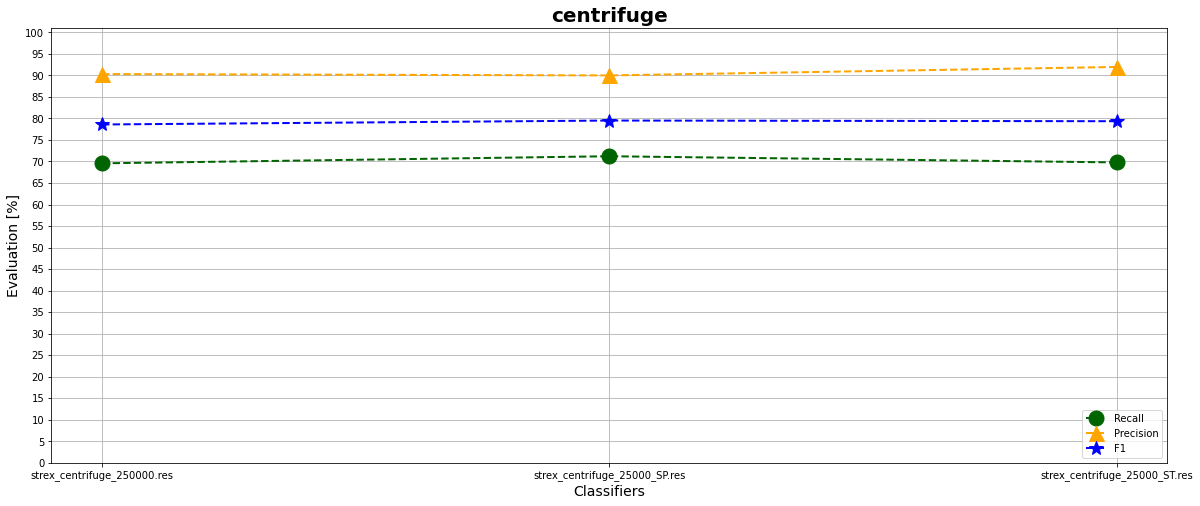

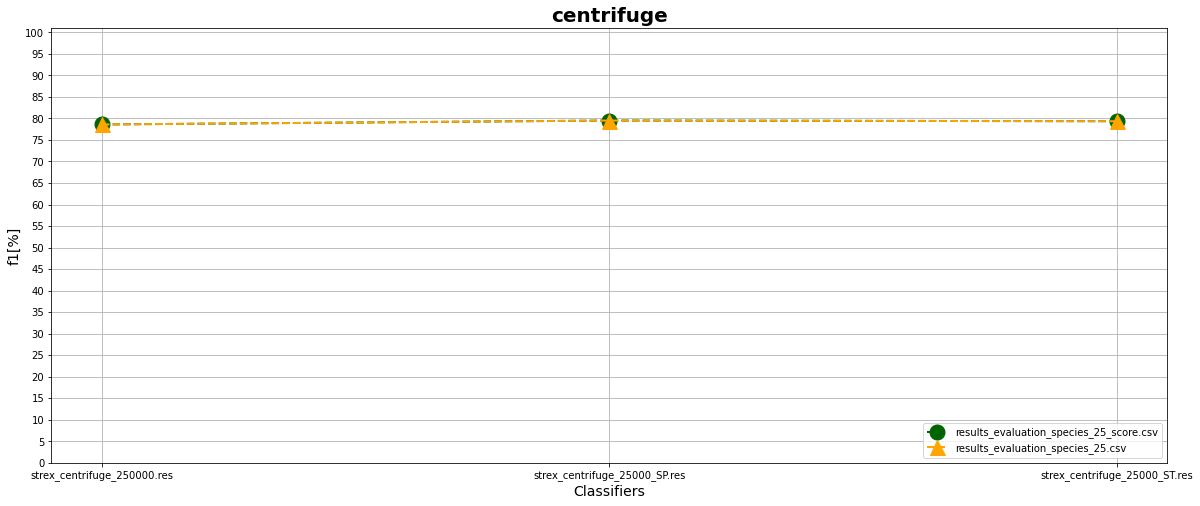

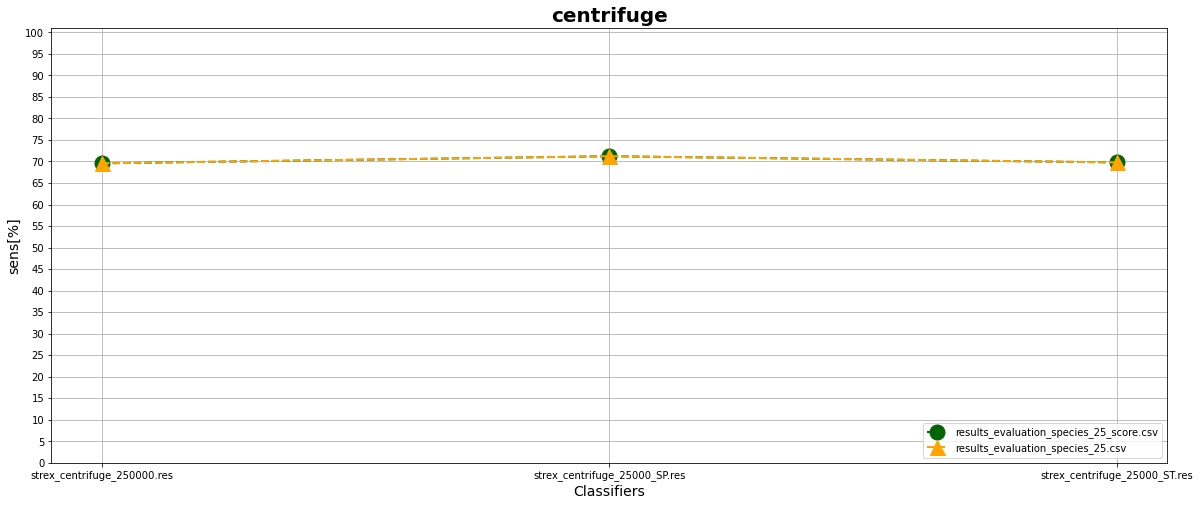

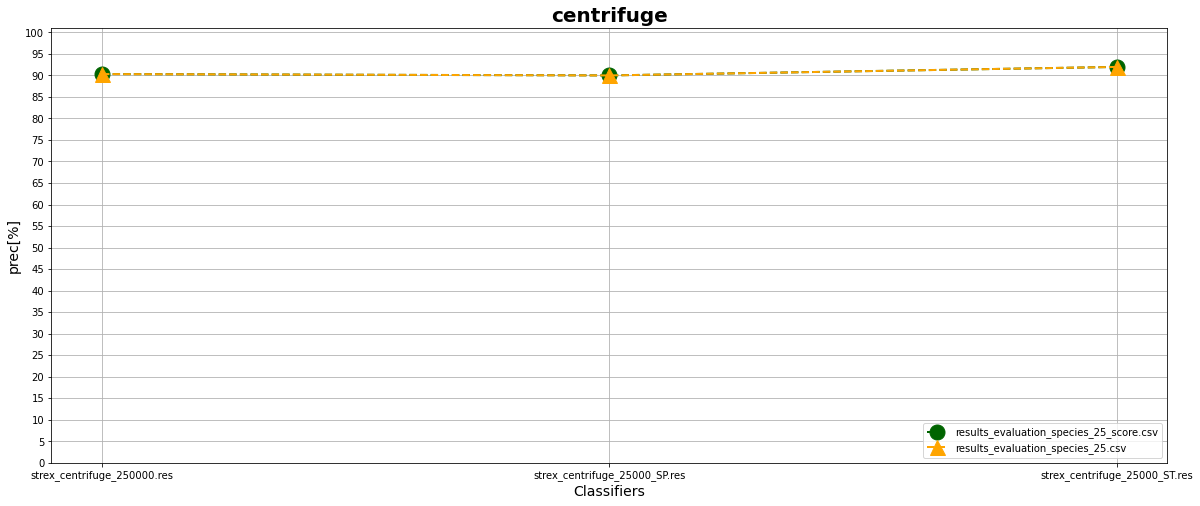

In [10]:
ClassifiersPlt('centrifuge')
CompareResults('centrifuge',df,filename1,df2,filename2,'f1')
CompareResults('centrifuge',df,filename1,df2,filename2,'sens')
CompareResults('centrifuge',df,filename1,df2,filename2,'prec')


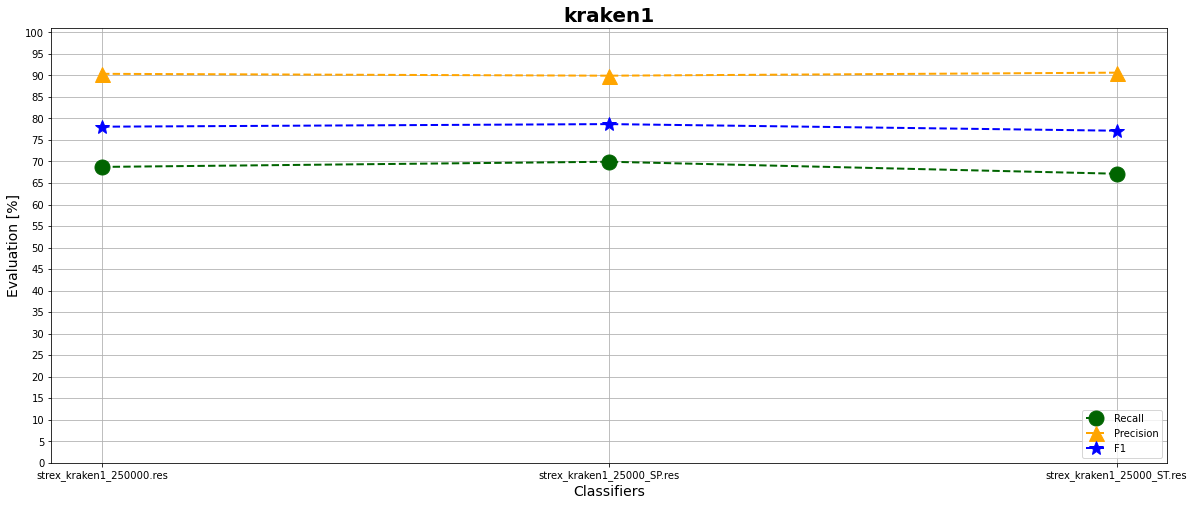

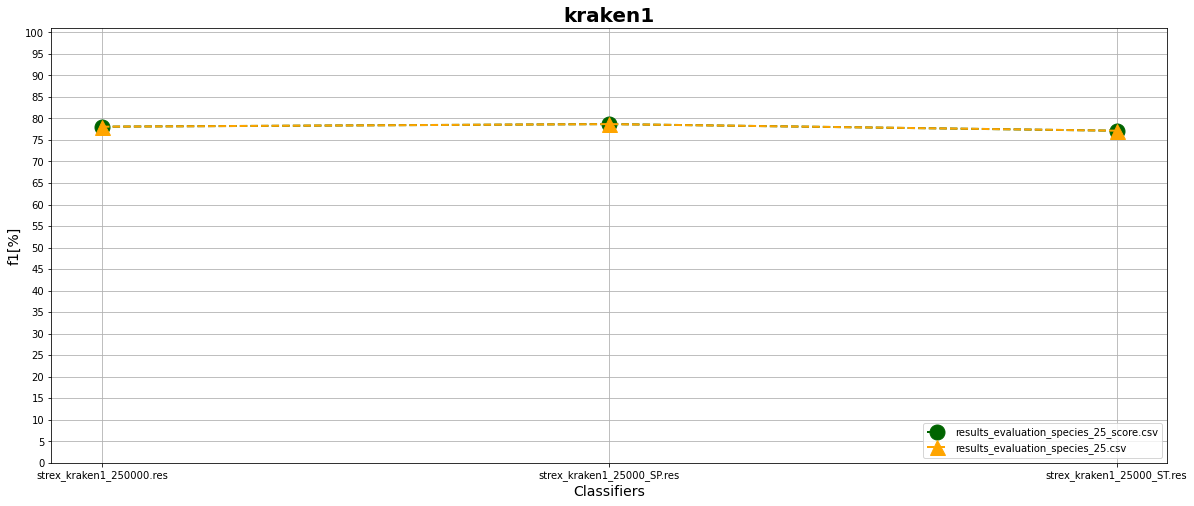

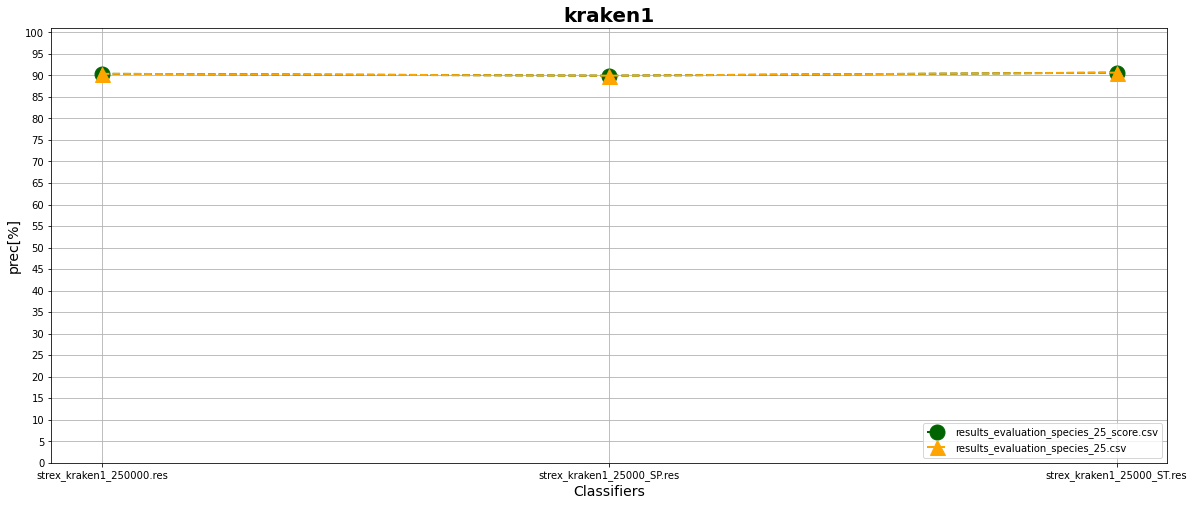

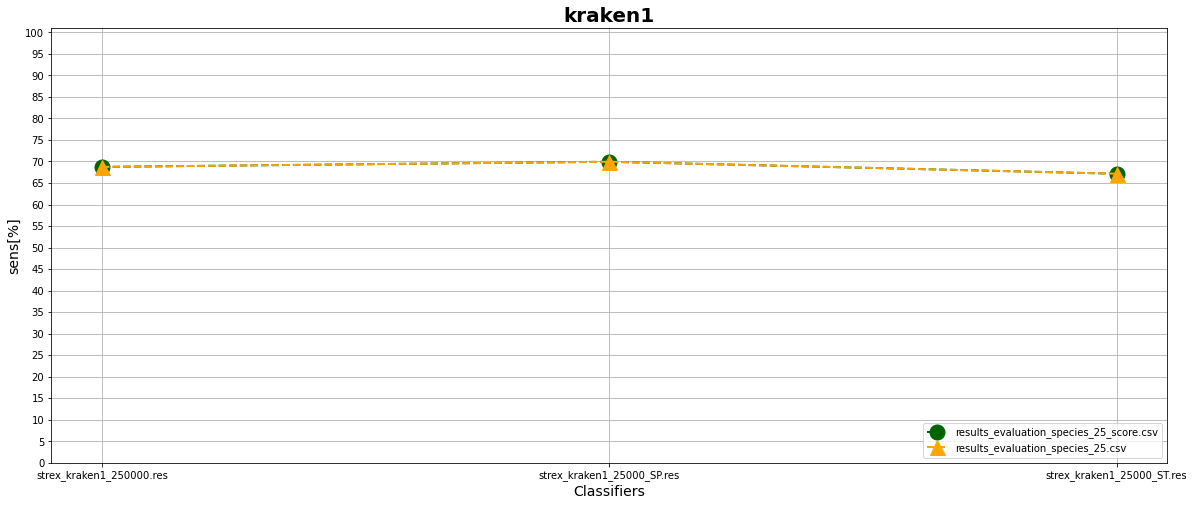

In [11]:
ClassifiersPlt('kraken1')
CompareResults('kraken1',df,filename1,df2,filename2,'f1')
CompareResults('kraken1',df,filename1,df2,filename2,'prec')
CompareResults('kraken1',df,filename1,df2,filename2,'sens')

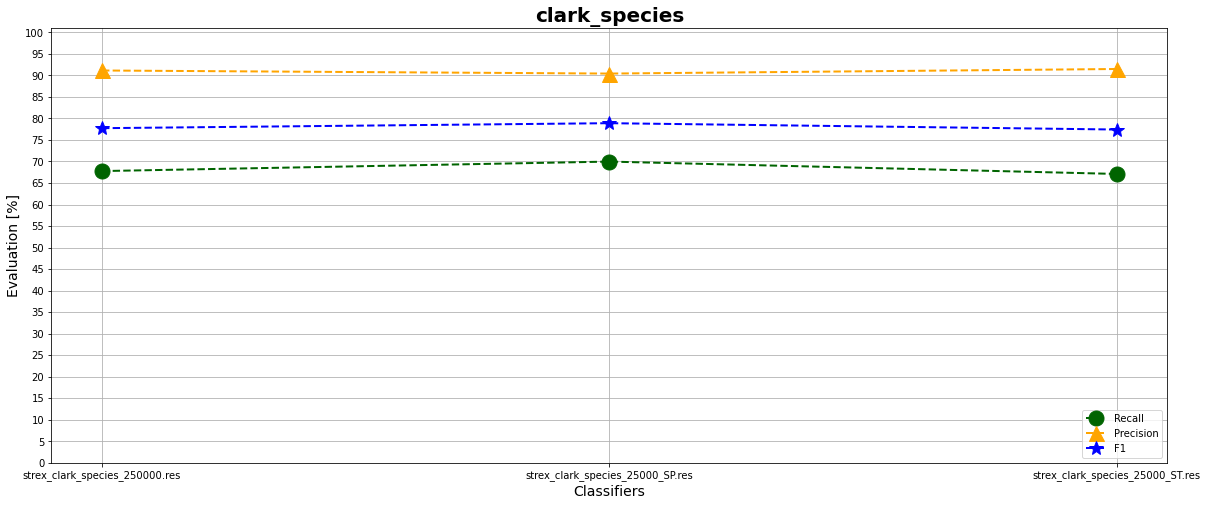

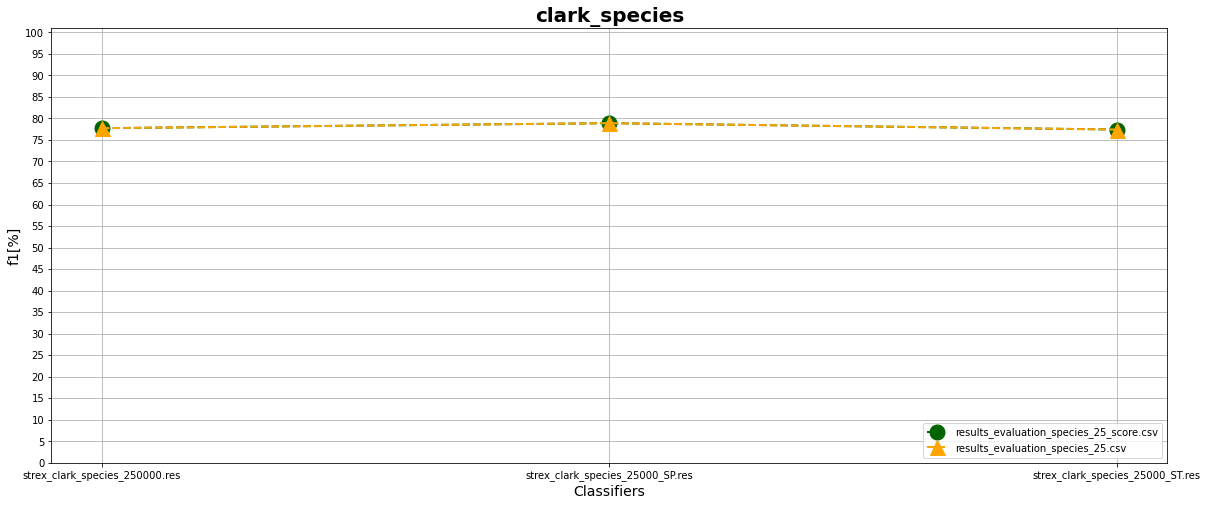

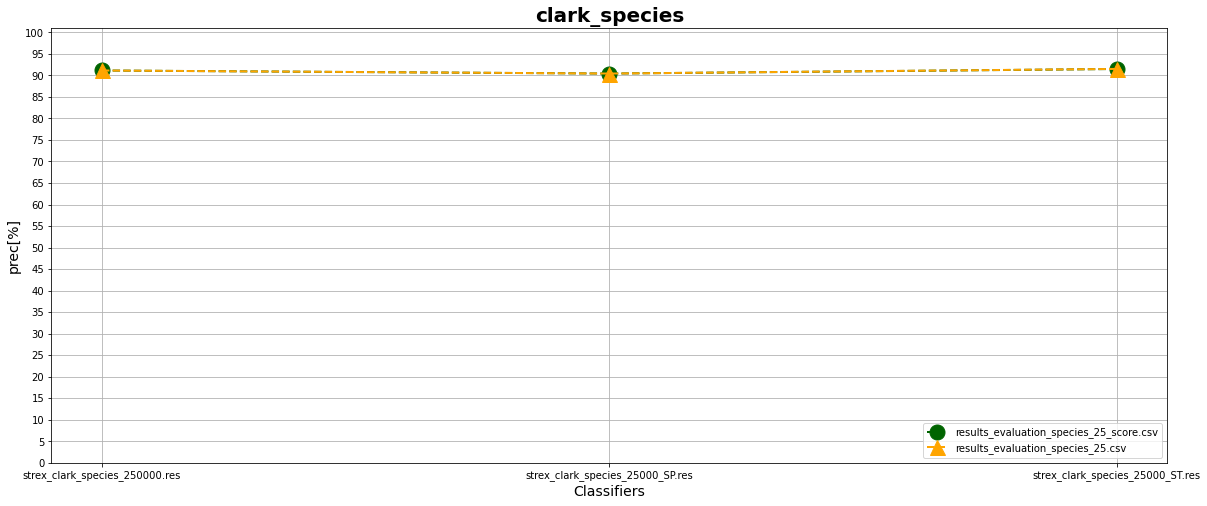

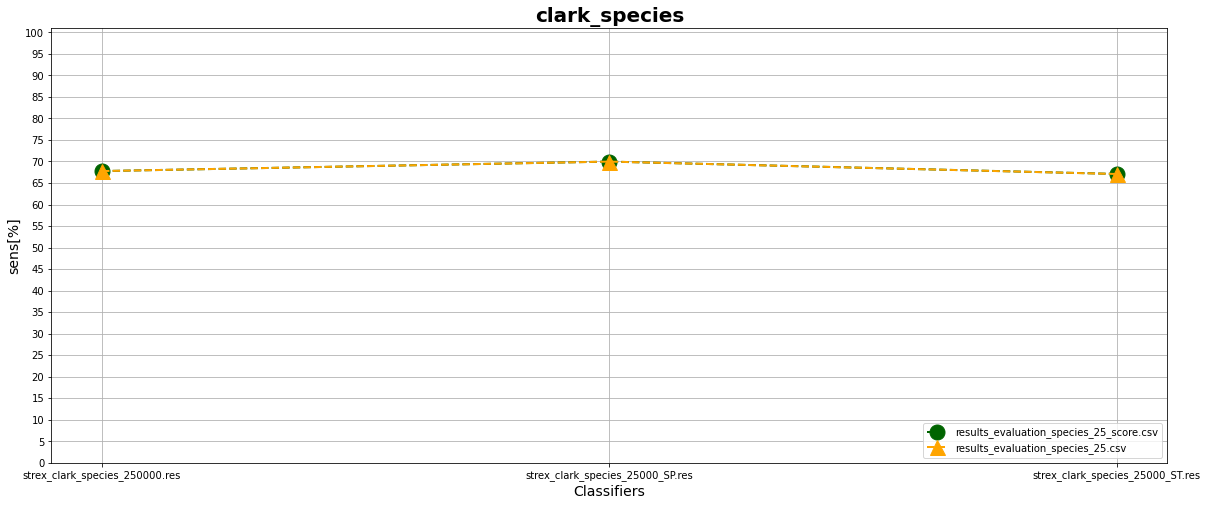

In [13]:
ClassifiersPlt('clark_species')
CompareResults('clark_species',df,filename1,df2,filename2,'f1')
CompareResults('clark_species',df,filename1,df2,filename2,'prec')
CompareResults('clark_species',df,filename1,df2,filename2,'sens')